In [1]:
import sys
import time
import runner
import argparse
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from runner import moving_average

# No Captain Tests

## sight 12,  5e5 setps,  5 marines

### test 1

In [2]:
max_train_steps = int(5e5)
evaluate_freq = max_train_steps//25
epsilon_decay_steps = max_train_steps*1//5

parser = argparse.ArgumentParser("Hyperparameter Setting for QMIX and VDN in SMAC environment")
parser.add_argument("--max_train_steps", type=int, default=max_train_steps, help=" Maximum number of training steps")
parser.add_argument("--evaluate_freq", type=float, default=evaluate_freq, help="Evaluate the policy every 'evaluate_freq' steps")
parser.add_argument("--evaluate_times", type=float, default=100, help="Evaluate times")

parser.add_argument("--algorithm", type=str, default="QMIX", help="QMIX or VDN")
parser.add_argument("--epsilon", type=float, default=1.0, help="Initial epsilon")
parser.add_argument("--epsilon_decay_steps", type=float, default=epsilon_decay_steps, help="How many steps before the epsilon decays to the minimum")
parser.add_argument("--epsilon_min", type=float, default=0.05, help="Minimum epsilon")
parser.add_argument("--buffer_size", type=int, default=5000, help="The capacity of the replay buffer")
parser.add_argument("--batch_size", type=int, default=32, help="Batch size (the number of episodes)")
parser.add_argument("--lr", type=float, default=5e-4, help="Learning rate")
parser.add_argument("--gamma", type=float, default=0.99, help="Discount factor")
parser.add_argument("--qmix_hidden_dim", type=int, default=32, help="The dimension of the hidden layer of the QMIX network")
parser.add_argument("--hyper_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of the hyper-network")
parser.add_argument("--hyper_layers_num", type=int, default=1, help="The number of layers of hyper-network")
parser.add_argument("--rnn_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of RNN")
parser.add_argument("--mlp_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of MLP")
parser.add_argument("--use_rnn", type=bool, default=True, help="Whether to use RNN")
parser.add_argument("--use_orthogonal_init", type=bool, default=True, help="Orthogonal initialization")
parser.add_argument("--use_grad_clip", type=bool, default=True, help="Gradient clip")
parser.add_argument("--use_lr_decay", type=bool, default=False, help="use lr decay")
parser.add_argument("--use_RMS", type=bool, default=False, help="Whether to use RMS,if False, we will use Adam")
parser.add_argument("--add_last_action", type=bool, default=True, help="Whether to add last actions into the observation")
parser.add_argument("--add_agent_id", type=bool, default=False, help="Whether to add agent id into the observation")
parser.add_argument("--use_double_q", type=bool, default=True, help="Whether to use double q-learning")
parser.add_argument("--use_reward_norm", type=bool, default=False, help="Whether to use reward normalization")
parser.add_argument("--use_hard_update", type=bool, default=True, help="Whether to use hard update")
parser.add_argument("--target_update_freq", type=int, default=200, help="Update frequency of the target network")
parser.add_argument("--tau", type=int, default=0.005, help="If use soft update")
parser.add_argument("--N_agents", type=int, default=5, help="Number of agents for a team")
parser.add_argument("--sight_range", type=int, default=6, help="Number of agents for a team")
sys.argv=['']
args = parser.parse_args()
args.epsilon_decay = (args.epsilon - args.epsilon_min) / args.epsilon_decay_steps


runner_q = runner.Runner_SMAC_QMIX(args, number=1, seed=0)
runner_q.run()
print(runner_q.win_rates)

INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 6370 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-unxoqxi7\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:6370/sc2api, attempt: 0, running: True


number of agents=5
obs_dim=82
state_dim=120
action_dim=11
episode_limit=200
------add last action------
------use RNN------
------use_orthogonal_init------
------use_orthogonal_init------
------algorithm: QMIX------
hyper_layers_num=1
hyper_layers_num=1
------optimizer: Adam------


INFO:absl:Connecting to: ws://127.0.0.1:6370/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:6370/sc2api, attempt: 2, running: True
INFO:absl:Connecting to: ws://127.0.0.1:6370/sc2api, attempt: 3, running: True


total_steps:0 	 win_rate:0.0 	 evaluate_reward:0.646736842105263
total_steps:20034 	 win_rate:0.0 	 evaluate_reward:3.4842105263157905
total_steps:40014 	 win_rate:0.0 	 evaluate_reward:3.328842105263157


INFO:absl:Shutdown gracefully.
INFO:absl:Shutdown with return code: 1
INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 6497 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-r9wqdbbh\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:6497/sc2api, attempt: 0, running: True
INFO:absl:Connecting to: ws://127.0.0.1:6497/sc2api, attempt: 1, running: True


total_steps:60016 	 win_rate:0.02 	 evaluate_reward:4.784842105263156
total_steps:80001 	 win_rate:0.0 	 evaluate_reward:4.038736842105262
total_steps:100006 	 win_rate:0.02 	 evaluate_reward:5.178105263157892


INFO:absl:Shutdown gracefully.
INFO:absl:Shutdown with return code: 1
INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 6691 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-pea3ql8l\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:6691/sc2api, attempt: 0, running: True
INFO:absl:Connecting to: ws://127.0.0.1:6691/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:6691/sc2api, attempt: 2, running: True


total_steps:120042 	 win_rate:0.08 	 evaluate_reward:6.992842105263159
total_steps:140016 	 win_rate:0.11 	 evaluate_reward:7.2218947368421
total_steps:160029 	 win_rate:0.15 	 evaluate_reward:8.815578947368419


INFO:absl:Shutdown gracefully.
INFO:absl:Shutdown with return code: 1
INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 8636 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-_wlcpljy\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:8636/sc2api, attempt: 0, running: True
INFO:absl:Connecting to: ws://127.0.0.1:8636/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:8636/sc2api, attempt: 2, running: True


total_steps:180051 	 win_rate:0.18 	 evaluate_reward:8.39073684210526
total_steps:200021 	 win_rate:0.21 	 evaluate_reward:9.088


INFO:absl:Shutdown gracefully.
INFO:absl:Shutdown with return code: 1
INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 2094 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-dxxkj2w_\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:2094/sc2api, attempt: 0, running: True
INFO:absl:Connecting to: ws://127.0.0.1:2094/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:2094/sc2api, attempt: 2, running: True


total_steps:220042 	 win_rate:0.24 	 evaluate_reward:9.777684210526317


In [2]:
max_train_steps = int(5e5)
evaluate_freq = max_train_steps//25
epsilon_decay_steps = max_train_steps*1//5

parser = argparse.ArgumentParser("Hyperparameter Setting for QMIX and VDN in SMAC environment")
parser.add_argument("--max_train_steps", type=int, default=max_train_steps, help=" Maximum number of training steps")
parser.add_argument("--evaluate_freq", type=float, default=evaluate_freq, help="Evaluate the policy every 'evaluate_freq' steps")
parser.add_argument("--evaluate_times", type=float, default=100, help="Evaluate times")

parser.add_argument("--algorithm", type=str, default="QMIX", help="QMIX or VDN")
parser.add_argument("--epsilon", type=float, default=1.0, help="Initial epsilon")
parser.add_argument("--epsilon_decay_steps", type=float, default=epsilon_decay_steps, help="How many steps before the epsilon decays to the minimum")
parser.add_argument("--epsilon_min", type=float, default=0.05, help="Minimum epsilon")
parser.add_argument("--buffer_size", type=int, default=5000, help="The capacity of the replay buffer")
parser.add_argument("--batch_size", type=int, default=32, help="Batch size (the number of episodes)")
parser.add_argument("--lr", type=float, default=5e-4, help="Learning rate")
parser.add_argument("--gamma", type=float, default=0.99, help="Discount factor")
parser.add_argument("--qmix_hidden_dim", type=int, default=32, help="The dimension of the hidden layer of the QMIX network")
parser.add_argument("--hyper_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of the hyper-network")
parser.add_argument("--hyper_layers_num", type=int, default=1, help="The number of layers of hyper-network")
parser.add_argument("--rnn_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of RNN")
parser.add_argument("--mlp_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of MLP")
parser.add_argument("--use_rnn", type=bool, default=True, help="Whether to use RNN")
parser.add_argument("--use_orthogonal_init", type=bool, default=True, help="Orthogonal initialization")
parser.add_argument("--use_grad_clip", type=bool, default=True, help="Gradient clip")
parser.add_argument("--use_lr_decay", type=bool, default=False, help="use lr decay")
parser.add_argument("--use_RMS", type=bool, default=False, help="Whether to use RMS,if False, we will use Adam")
parser.add_argument("--add_last_action", type=bool, default=True, help="Whether to add last actions into the observation")
parser.add_argument("--add_agent_id", type=bool, default=False, help="Whether to add agent id into the observation")
parser.add_argument("--use_double_q", type=bool, default=True, help="Whether to use double q-learning")
parser.add_argument("--use_reward_norm", type=bool, default=False, help="Whether to use reward normalization")
parser.add_argument("--use_hard_update", type=bool, default=True, help="Whether to use hard update")
parser.add_argument("--target_update_freq", type=int, default=200, help="Update frequency of the target network")
parser.add_argument("--tau", type=int, default=0.005, help="If use soft update")
parser.add_argument("--N_agents", type=int, default=5, help="Number of agents for a team")
parser.add_argument("--sight_range", type=int, default=9, help="Number of agents for a team")
sys.argv=['']
args = parser.parse_args()
args.epsilon_decay = (args.epsilon - args.epsilon_min) / args.epsilon_decay_steps


runner_q = runner.Runner_SMAC_QMIX(args, number=1, seed=0)
runner_q.run()
print(runner_q.win_rates)

INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 11596 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-fijlcez4\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:11596/sc2api, attempt: 0, running: True


number of agents=5
obs_dim=82
state_dim=120
action_dim=11
episode_limit=200
------add last action------
------use RNN------
------use_orthogonal_init------
------use_orthogonal_init------
------algorithm: QMIX------
hyper_layers_num=1
hyper_layers_num=1
------optimizer: Adam------


INFO:absl:Connecting to: ws://127.0.0.1:11596/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:11596/sc2api, attempt: 2, running: True


total_steps:0 	 win_rate:0.0 	 evaluate_reward:1.6631578947368424
total_steps:20017 	 win_rate:0.09 	 evaluate_reward:6.746105263157891
total_steps:40027 	 win_rate:0.11 	 evaluate_reward:7.853473684210525


INFO:absl:Shutdown gracefully.
INFO:absl:Shutdown with return code: 1
INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 13705 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-vss5ujg3\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:13705/sc2api, attempt: 0, running: True
INFO:absl:Connecting to: ws://127.0.0.1:13705/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:13705/sc2api, attempt: 2, running: True


total_steps:60006 	 win_rate:0.29 	 evaluate_reward:11.297684210526322
total_steps:80000 	 win_rate:0.36 	 evaluate_reward:12.511157894736844


## sight 6,  5e5 setps,  5 marines

### test 1

In [ ]:
max_train_steps = int(5e5)
evaluate_freq = max_train_steps//25
epsilon_decay_steps = max_train_steps*1//5

parser = argparse.ArgumentParser("Hyperparameter Setting for QMIX and VDN in SMAC environment")
parser.add_argument("--max_train_steps", type=int, default=max_train_steps, help=" Maximum number of training steps")
parser.add_argument("--evaluate_freq", type=float, default=evaluate_freq, help="Evaluate the policy every 'evaluate_freq' steps")
parser.add_argument("--evaluate_times", type=float, default=100, help="Evaluate times")

parser.add_argument("--algorithm", type=str, default="QMIX", help="QMIX or VDN")
parser.add_argument("--epsilon", type=float, default=1.0, help="Initial epsilon")
parser.add_argument("--epsilon_decay_steps", type=float, default=epsilon_decay_steps, help="How many steps before the epsilon decays to the minimum")
parser.add_argument("--epsilon_min", type=float, default=0.05, help="Minimum epsilon")
parser.add_argument("--buffer_size", type=int, default=5000, help="The capacity of the replay buffer")
parser.add_argument("--batch_size", type=int, default=32, help="Batch size (the number of episodes)")
parser.add_argument("--lr", type=float, default=5e-4, help="Learning rate")
parser.add_argument("--gamma", type=float, default=0.99, help="Discount factor")
parser.add_argument("--qmix_hidden_dim", type=int, default=32, help="The dimension of the hidden layer of the QMIX network")
parser.add_argument("--hyper_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of the hyper-network")
parser.add_argument("--hyper_layers_num", type=int, default=1, help="The number of layers of hyper-network")
parser.add_argument("--rnn_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of RNN")
parser.add_argument("--mlp_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of MLP")
parser.add_argument("--use_rnn", type=bool, default=True, help="Whether to use RNN")
parser.add_argument("--use_orthogonal_init", type=bool, default=True, help="Orthogonal initialization")
parser.add_argument("--use_grad_clip", type=bool, default=True, help="Gradient clip")
parser.add_argument("--use_lr_decay", type=bool, default=False, help="use lr decay")
parser.add_argument("--use_RMS", type=bool, default=False, help="Whether to use RMS,if False, we will use Adam")
parser.add_argument("--add_last_action", type=bool, default=True, help="Whether to add last actions into the observation")
parser.add_argument("--add_agent_id", type=bool, default=False, help="Whether to add agent id into the observation")
parser.add_argument("--use_double_q", type=bool, default=True, help="Whether to use double q-learning")
parser.add_argument("--use_reward_norm", type=bool, default=False, help="Whether to use reward normalization")
parser.add_argument("--use_hard_update", type=bool, default=True, help="Whether to use hard update")
parser.add_argument("--target_update_freq", type=int, default=200, help="Update frequency of the target network")
parser.add_argument("--tau", type=int, default=0.005, help="If use soft update")
parser.add_argument("--N_agents", type=int, default=5, help="Number of agents for a team")
parser.add_argument("--sight_range", type=int, default=6, help="Number of agents for a team")
sys.argv=['']
args = parser.parse_args()
args.epsilon_decay = (args.epsilon - args.epsilon_min) / args.epsilon_decay_steps


runner_q = runner.Runner_QMIX_SMAC(args, number=1, seed=0)
runner_q.run()
print(runner_q.win_rates)

# With QMIX Captain Tests

## 5e5 5 marines ratio 3

### test1

In [ ]:
max_train_steps = int(5e5)
evaluate_freq = max_train_steps//25
epsilon_decay_steps = max_train_steps*1//5

parser = argparse.ArgumentParser("Hyperparameter Setting for QMIX and VDN in SMAC environment")
parser.add_argument("--max_train_steps", type=int, default=max_train_steps, help=" Maximum number of training steps")
parser.add_argument("--evaluate_freq", type=float, default=evaluate_freq, help="Evaluate the policy every 'evaluate_freq' steps")
parser.add_argument("--evaluate_times", type=float, default=100, help="Evaluate times")
parser.add_argument("--load_from_file", type=int, default=False, help="Use pretrained model")

parser.add_argument("--algorithm", type=str, default="QMIX", help="QMIX or VDN")
parser.add_argument("--epsilon", type=float, default=1.0, help="Initial epsilon")
parser.add_argument("--epsilon_decay_steps", type=float, default=epsilon_decay_steps, help="How many steps before the epsilon decays to the minimum")
parser.add_argument("--epsilon_min", type=float, default=0.05, help="Minimum epsilon")
parser.add_argument("--buffer_size", type=int, default=5000, help="The capacity of the replay buffer")
parser.add_argument("--batch_size", type=int, default=32, help="Batch size (the number of episodes)")
parser.add_argument("--lr", type=float, default=5e-4, help="Learning rate")
parser.add_argument("--gamma", type=float, default=0.99, help="Discount factor")
parser.add_argument("--qmix_hidden_dim", type=int, default=32, help="The dimension of the hidden layer of the QMIX network")
parser.add_argument("--hyper_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of the hyper-network")
parser.add_argument("--hyper_layers_num", type=int, default=1, help="The number of layers of hyper-network")
parser.add_argument("--rnn_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of RNN")
parser.add_argument("--mlp_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of MLP")
parser.add_argument("--use_rnn", type=bool, default=True, help="Whether to use RNN")
parser.add_argument("--use_orthogonal_init", type=bool, default=True, help="Orthogonal initialization")
parser.add_argument("--use_grad_clip", type=bool, default=True, help="Gradient clip")
parser.add_argument("--use_lr_decay", type=bool, default=False, help="use lr decay")
parser.add_argument("--use_RMS", type=bool, default=False, help="Whether to use RMS,if False, we will use Adam")
parser.add_argument("--add_last_action", type=bool, default=True, help="Whether to add last actions into the observation")
parser.add_argument("--add_agent_id", type=bool, default=False, help="Whether to add agent id into the observation")
parser.add_argument("--use_double_q", type=bool, default=True, help="Whether to use double q-learning")
parser.add_argument("--use_reward_norm", type=bool, default=False, help="Whether to use reward normalization")
parser.add_argument("--use_hard_update", type=bool, default=True, help="Whether to use hard update")
parser.add_argument("--target_update_freq", type=int, default=200, help="Update frequency of the target network")
parser.add_argument("--tau", type=int, default=0.005, help="If use soft update")
parser.add_argument("--kill_sight_reward_ratio", type=int, default=10, help="ratio of sight change penalty to state reward")
parser.add_argument("--N_agents", type=int, default=5, help="Number of agents for a team")
sys.argv=['']
args = parser.parse_args()
args.epsilon_decay = (args.epsilon - args.epsilon_min) / args.epsilon_decay_steps


runner_qq = runner.Runner_SMAC_QMIX_QMIX(args, number=1, seed=0)
runner_qq.run()
print(runner_qq.win_rates)

In [ ]:
runner_qq.plot(average=5000)

## 5e5 5 marines ratio 100

### test 1

In [ ]:
max_train_steps = int(5e5)
evaluate_freq = max_train_steps//25
epsilon_decay_steps = max_train_steps*1//5

parser = argparse.ArgumentParser("Hyperparameter Setting for QMIX and VDN in SMAC environment")
parser.add_argument("--max_train_steps", type=int, default=max_train_steps, help=" Maximum number of training steps")
parser.add_argument("--evaluate_freq", type=float, default=evaluate_freq, help="Evaluate the policy every 'evaluate_freq' steps")
parser.add_argument("--evaluate_times", type=float, default=100, help="Evaluate times")
parser.add_argument("--load_from_file", type=int, default=False, help="Use pretrained model")

parser.add_argument("--algorithm", type=str, default="QMIX", help="QMIX or VDN")
parser.add_argument("--epsilon", type=float, default=1.0, help="Initial epsilon")
parser.add_argument("--epsilon_decay_steps", type=float, default=epsilon_decay_steps, help="How many steps before the epsilon decays to the minimum")
parser.add_argument("--epsilon_min", type=float, default=0.05, help="Minimum epsilon")
parser.add_argument("--buffer_size", type=int, default=5000, help="The capacity of the replay buffer")
parser.add_argument("--batch_size", type=int, default=32, help="Batch size (the number of episodes)")
parser.add_argument("--lr", type=float, default=5e-4, help="Learning rate")
parser.add_argument("--gamma", type=float, default=0.99, help="Discount factor")
parser.add_argument("--qmix_hidden_dim", type=int, default=32, help="The dimension of the hidden layer of the QMIX network")
parser.add_argument("--hyper_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of the hyper-network")
parser.add_argument("--hyper_layers_num", type=int, default=1, help="The number of layers of hyper-network")
parser.add_argument("--rnn_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of RNN")
parser.add_argument("--mlp_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of MLP")
parser.add_argument("--use_rnn", type=bool, default=True, help="Whether to use RNN")
parser.add_argument("--use_orthogonal_init", type=bool, default=True, help="Orthogonal initialization")
parser.add_argument("--use_grad_clip", type=bool, default=True, help="Gradient clip")
parser.add_argument("--use_lr_decay", type=bool, default=False, help="use lr decay")
parser.add_argument("--use_RMS", type=bool, default=False, help="Whether to use RMS,if False, we will use Adam")
parser.add_argument("--add_last_action", type=bool, default=True, help="Whether to add last actions into the observation")
parser.add_argument("--add_agent_id", type=bool, default=False, help="Whether to add agent id into the observation")
parser.add_argument("--use_double_q", type=bool, default=True, help="Whether to use double q-learning")
parser.add_argument("--use_reward_norm", type=bool, default=False, help="Whether to use reward normalization")
parser.add_argument("--use_hard_update", type=bool, default=True, help="Whether to use hard update")
parser.add_argument("--target_update_freq", type=int, default=200, help="Update frequency of the target network")
parser.add_argument("--tau", type=int, default=0.005, help="If use soft update")
parser.add_argument("--kill_sight_reward_ratio", type=int, default=100, help="ratio of sight change penalty to state reward")
parser.add_argument("--N_agents", type=int, default=5, help="Number of agents for a team")
sys.argv=['']
args = parser.parse_args()
args.epsilon_decay = (args.epsilon - args.epsilon_min) / args.epsilon_decay_steps


runner_qq = runner.Runner_SMAC_QMIX_QMIX(args, number=1, seed=0)
runner_qq.run()
print(runner_qq.win_rates)

In [ ]:
runner_qq.plot(average=5000)

# With QL Captain Tests

## 5e5 5 marines ratio 10

In [ ]:
max_train_steps = int(5e5)
evaluate_freq = max_train_steps//25
epsilon_decay_steps = max_train_steps*1//5

parser = argparse.ArgumentParser("Hyperparameter Setting for QMIX and VDN in SMAC environment")
parser.add_argument("--max_train_steps", type=int, default=max_train_steps, help=" Maximum number of training steps")
parser.add_argument("--evaluate_freq", type=float, default=evaluate_freq, help="Evaluate the policy every 'evaluate_freq' steps")
parser.add_argument("--evaluate_times", type=float, default=100, help="Evaluate times")
parser.add_argument("--load_from_file", type=int, default=False, help="Use pretrained model")

parser.add_argument("--algorithm", type=str, default="QMIX", help="QMIX or VDN")
parser.add_argument("--epsilon", type=float, default=1.0, help="Initial epsilon")
parser.add_argument("--epsilon_decay_steps", type=float, default=epsilon_decay_steps, help="How many steps before the epsilon decays to the minimum")
parser.add_argument("--epsilon_min", type=float, default=0.05, help="Minimum epsilon")
parser.add_argument("--buffer_size", type=int, default=5000, help="The capacity of the replay buffer")
parser.add_argument("--batch_size", type=int, default=32, help="Batch size (the number of episodes)")
parser.add_argument("--lr", type=float, default=5e-4, help="Learning rate")
parser.add_argument("--gamma", type=float, default=0.99, help="Discount factor")
parser.add_argument("--qmix_hidden_dim", type=int, default=32, help="The dimension of the hidden layer of the QMIX network")
parser.add_argument("--hyper_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of the hyper-network")
parser.add_argument("--hyper_layers_num", type=int, default=1, help="The number of layers of hyper-network")
parser.add_argument("--rnn_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of RNN")
parser.add_argument("--mlp_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of MLP")
parser.add_argument("--use_rnn", type=bool, default=True, help="Whether to use RNN")
parser.add_argument("--use_orthogonal_init", type=bool, default=True, help="Orthogonal initialization")
parser.add_argument("--use_grad_clip", type=bool, default=True, help="Gradient clip")
parser.add_argument("--use_lr_decay", type=bool, default=False, help="use lr decay")
parser.add_argument("--use_RMS", type=bool, default=False, help="Whether to use RMS,if False, we will use Adam")
parser.add_argument("--add_last_action", type=bool, default=True, help="Whether to add last actions into the observation")
parser.add_argument("--add_agent_id", type=bool, default=False, help="Whether to add agent id into the observation")
parser.add_argument("--use_double_q", type=bool, default=True, help="Whether to use double q-learning")
parser.add_argument("--use_reward_norm", type=bool, default=False, help="Whether to use reward normalization")
parser.add_argument("--use_hard_update", type=bool, default=True, help="Whether to use hard update")
parser.add_argument("--target_update_freq", type=int, default=200, help="Update frequency of the target network")
parser.add_argument("--tau", type=int, default=0.005, help="If use soft update")
parser.add_argument("--kill_sight_reward_ratio", type=int, default=10, help="ratio of sight change penalty to state reward")
parser.add_argument("--N_agents", type=int, default=5, help="Number of agents for a team")
sys.argv=['']
args = parser.parse_args()
args.epsilon_decay = (args.epsilon - args.epsilon_min) / args.epsilon_decay_steps


runner_iq = runner.Runner_SMAC_QMIX_IQL(args, number=1, seed=0)
runner_iq.run()
print(runner_iq.win_rates)

# With PPO Decentralized

In [2]:
max_train_steps = int(5e5)
evaluate_freq = max_train_steps//25
epsilon_decay_steps = max_train_steps*1//5

parser = argparse.ArgumentParser("Hyperparameter Setting for QMIX and VDN in SMAC environment")
parser.add_argument("--max_train_steps", type=int, default=max_train_steps, help=" Maximum number of training steps")
parser.add_argument("--evaluate_freq", type=float, default=evaluate_freq, help="Evaluate the policy every 'evaluate_freq' steps")
parser.add_argument("--evaluate_times", type=float, default=100, help="Evaluate times")
parser.add_argument("--load_from_file", type=int, default=False, help="Use pretrained model")

parser.add_argument("--algorithm", type=str, default="QMIX", help="QMIX or VDN")
parser.add_argument("--epsilon", type=float, default=1.0, help="Initial epsilon")
parser.add_argument("--epsilon_decay_steps", type=float, default=epsilon_decay_steps, help="How many steps before the epsilon decays to the minimum")
parser.add_argument("--epsilon_min", type=float, default=0.05, help="Minimum epsilon")
parser.add_argument("--buffer_size", type=int, default=5000, help="The capacity of the replay buffer")
parser.add_argument("--batch_size", type=int, default=32, help="Batch size (the number of episodes)")
parser.add_argument("--lr", type=float, default=5e-4, help="Learning rate")
parser.add_argument("--gamma", type=float, default=0.99, help="Discount factor")
parser.add_argument("--qmix_hidden_dim", type=int, default=32, help="The dimension of the hidden layer of the QMIX network")
parser.add_argument("--hyper_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of the hyper-network")
parser.add_argument("--hyper_layers_num", type=int, default=1, help="The number of layers of hyper-network")
parser.add_argument("--rnn_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of RNN")
parser.add_argument("--mlp_hidden_dim", type=int, default=64, help="The dimension of the hidden layer of MLP")
parser.add_argument("--use_rnn", type=bool, default=True, help="Whether to use RNN")
parser.add_argument("--use_orthogonal_init", type=bool, default=True, help="Orthogonal initialization")
parser.add_argument("--use_grad_clip", type=bool, default=True, help="Gradient clip")
parser.add_argument("--use_lr_decay", type=bool, default=False, help="use lr decay")
parser.add_argument("--use_RMS", type=bool, default=False, help="Whether to use RMS,if False, we will use Adam")
parser.add_argument("--add_last_action", type=bool, default=True, help="Whether to add last actions into the observation")
parser.add_argument("--add_agent_id", type=bool, default=False, help="Whether to add agent id into the observation")
parser.add_argument("--use_double_q", type=bool, default=True, help="Whether to use double q-learning")
parser.add_argument("--use_reward_norm", type=bool, default=False, help="Whether to use reward normalization")
parser.add_argument("--use_hard_update", type=bool, default=True, help="Whether to use hard update")
parser.add_argument("--target_update_freq", type=int, default=200, help="Update frequency of the target network")
parser.add_argument("--tau", type=int, default=0.005, help="If use soft update")
parser.add_argument("--kill_sight_reward_ratio", type=int, default=10, help="ratio of sight change penalty to state reward")
parser.add_argument("--N_agents", type=int, default=5, help="Number of agents for a team")
sys.argv=['']
args = parser.parse_args()
args.epsilon_decay = (args.epsilon - args.epsilon_min) / args.epsilon_decay_steps


start_time = time.time()
runner_qp = runner.Runner_SMAC_QMIX_Continuous_PPO(args, number=1, seed=0)
runner_qp.run()
print(runner_qp.win_rates)
end_time = time.time()
print(f'total execution time: {(end_time - start_time)/60:0.2f} minutes')

INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 2168 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-1uoxfz4u\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:2168/sc2api, attempt: 0, running: True


number of agents=5
obs_dim=82
state_dim=120
action_dim=11
episode_limit=200
------add last action------
------use RNN------
------use_orthogonal_init------
------use_orthogonal_init------
------algorithm: QMIX------
hyper_layers_num=1
hyper_layers_num=1
------optimizer: Adam------


INFO:absl:Connecting to: ws://127.0.0.1:2168/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:2168/sc2api, attempt: 2, running: True


total_steps:3121 	 win_rate:0.0 	 evaluate_reward:0.6778947368421051
total_steps:23220 	 win_rate:0.15 	 evaluate_reward:7.895578947368418
total_steps:43150 	 win_rate:0.09 	 evaluate_reward:7.306105263157894
total_steps:63058 	 win_rate:0.02 	 evaluate_reward:4.2399999999999975


INFO:absl:Shutdown gracefully.
INFO:absl:Shutdown with return code: 1
INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 2546 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-h16d50_t\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:2546/sc2api, attempt: 0, running: True
INFO:absl:Connecting to: ws://127.0.0.1:2546/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:2546/sc2api, attempt: 2, running: True


total_steps:82977 	 win_rate:0.03 	 evaluate_reward:5.321684210526315
total_steps:103483 	 win_rate:0.05 	 evaluate_reward:5.714947368421052
total_steps:123542 	 win_rate:0.0 	 evaluate_reward:4.4892631578947375


INFO:absl:Shutdown gracefully.
INFO:absl:Shutdown with return code: 1
INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 2903 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-3b9ca525\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:2903/sc2api, attempt: 0, running: True
INFO:absl:Connecting to: ws://127.0.0.1:2903/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:2903/sc2api, attempt: 2, running: True


total_steps:143617 	 win_rate:0.25 	 evaluate_reward:10.017684210526317
total_steps:163707 	 win_rate:0.03 	 evaluate_reward:5.648842105263159
total_steps:183711 	 win_rate:0.2 	 evaluate_reward:9.33221052631579


INFO:absl:Shutdown gracefully.
INFO:absl:Shutdown with return code: 1
INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 3360 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-2nwpw4y0\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:3360/sc2api, attempt: 0, running: True
INFO:absl:Connecting to: ws://127.0.0.1:3360/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:3360/sc2api, attempt: 2, running: True


total_steps:203265 	 win_rate:0.59 	 evaluate_reward:14.999157894736845
total_steps:223228 	 win_rate:0.73 	 evaluate_reward:16.92757894736842
total_steps:243221 	 win_rate:0.72 	 evaluate_reward:16.792


INFO:absl:Shutdown gracefully.
INFO:absl:Shutdown with return code: 1
INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 3848 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-1_93mxbj\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:3848/sc2api, attempt: 0, running: True
INFO:absl:Connecting to: ws://127.0.0.1:3848/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:3848/sc2api, attempt: 2, running: True


total_steps:263093 	 win_rate:0.74 	 evaluate_reward:17.00926315789474
total_steps:283290 	 win_rate:0.81 	 evaluate_reward:17.936
total_steps:303366 	 win_rate:0.84 	 evaluate_reward:18.27284210526316


INFO:absl:Shutdown gracefully.
INFO:absl:Shutdown with return code: 1
INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 4367 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-cz12jxt9\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:4367/sc2api, attempt: 0, running: True
INFO:absl:Connecting to: ws://127.0.0.1:4367/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:4367/sc2api, attempt: 2, running: True


total_steps:323245 	 win_rate:0.87 	 evaluate_reward:18.427368421052627
total_steps:343364 	 win_rate:0.89 	 evaluate_reward:18.682105263157894
total_steps:363148 	 win_rate:0.8 	 evaluate_reward:17.74863157894737
total_steps:383320 	 win_rate:0.85 	 evaluate_reward:18.387368421052628


INFO:absl:Shutdown gracefully.
INFO:absl:Shutdown with return code: 1
INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 4872 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-vsmvunbd\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:4872/sc2api, attempt: 0, running: True
INFO:absl:Connecting to: ws://127.0.0.1:4872/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:4872/sc2api, attempt: 2, running: True


total_steps:403399 	 win_rate:0.9 	 evaluate_reward:18.951157894736845
total_steps:423441 	 win_rate:0.91 	 evaluate_reward:18.966736842105266
total_steps:443395 	 win_rate:0.83 	 evaluate_reward:18.064421052631577


INFO:absl:Shutdown gracefully.
INFO:absl:Shutdown with return code: 1
INFO:absl:Launching SC2: C:/Program Files (x86)/StarCraft II\Versions/Base90136\SC2_x64.exe -listen 127.0.0.1 -port 5373 -dataDir C:/Program Files (x86)/StarCraft II\ -tempDir C:\Users\nimaz\AppData\Local\Temp\sc-j2ao4w86\ -displayMode 0 -windowwidth 1920 -windowheight 1200 -windowx 50 -windowy 50
INFO:absl:Connecting to: ws://127.0.0.1:5373/sc2api, attempt: 0, running: True
INFO:absl:Connecting to: ws://127.0.0.1:5373/sc2api, attempt: 1, running: True
INFO:absl:Connecting to: ws://127.0.0.1:5373/sc2api, attempt: 2, running: True
INFO:absl:Connecting to: ws://127.0.0.1:5373/sc2api, attempt: 3, running: True


total_steps:463510 	 win_rate:0.84 	 evaluate_reward:18.252210526315785
total_steps:483495 	 win_rate:0.9 	 evaluate_reward:18.955368421052633


INFO:absl:Shutdown gracefully.
INFO:absl:Shutdown with return code: 1


total_steps:503353 	 win_rate:0.82 	 evaluate_reward:17.85894736842105
[0.0, 0.15, 0.09, 0.02, 0.03, 0.05, 0.0, 0.25, 0.03, 0.2, 0.59, 0.73, 0.72, 0.74, 0.81, 0.84, 0.87, 0.89, 0.8, 0.85, 0.9, 0.91, 0.83, 0.84, 0.9, 0.82]
total execution time: 476.37 minutes


In [8]:
runner_iq.list_of_agents_sight_networks[0].action_std

2.3349

In [108]:
(12**2-9**2)/10

6.3

In [110]:
(12-9)/3

1.0

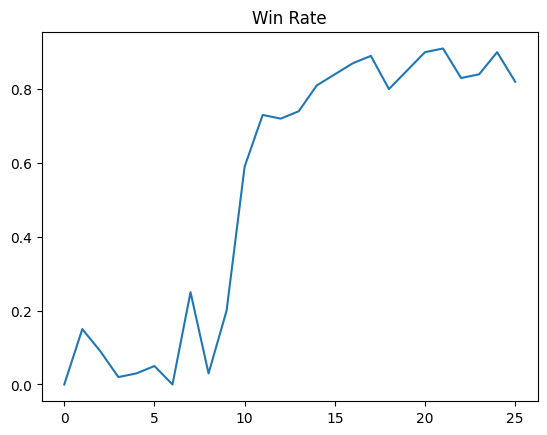

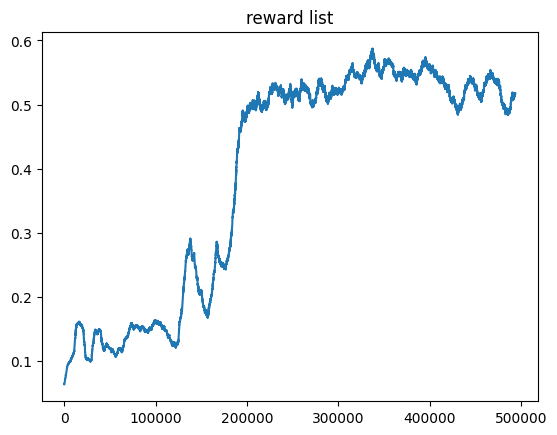

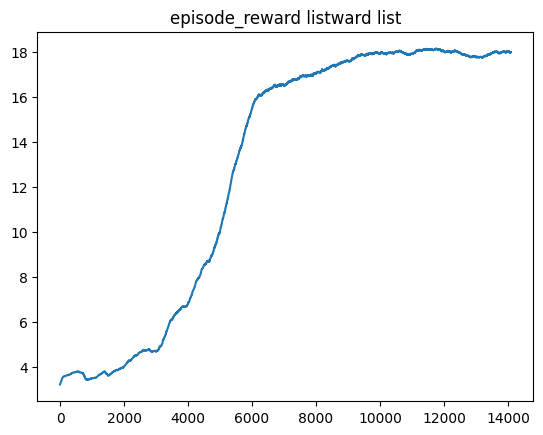

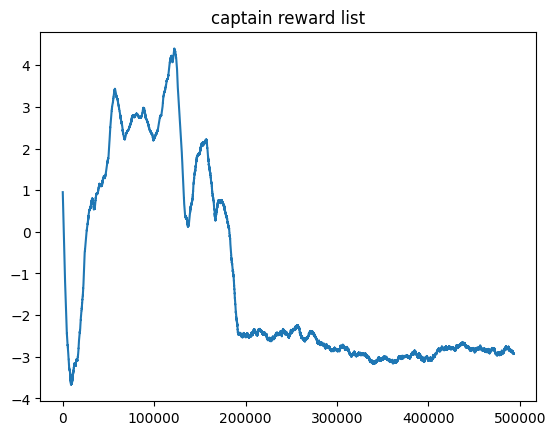

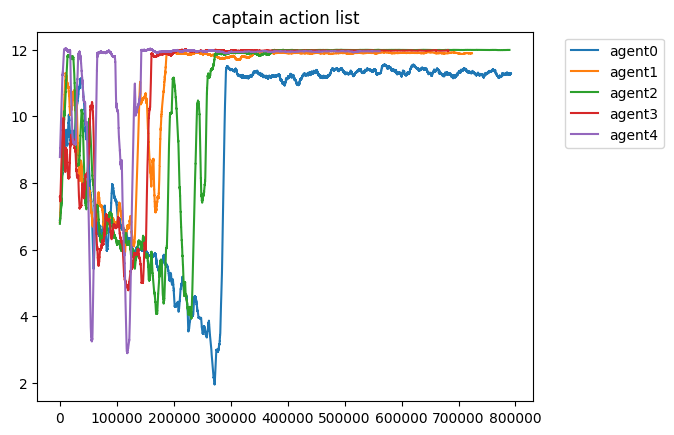

In [103]:
runner_qp.plot(average=10000)

In [111]:
import continuous_ppo

In [112]:
a = continuous_ppo.PPO(state_dim=2, action_dim=1 ,lr_actor=5e-4,
                            lr_critic = 5e-4, gamma=0.99, K_epochs = 40, eps_clip = 0.2, has_continuous_action_space = True,
                            action_std_init = 0.1 , action_std_decay_rate = 0.5)

In [149]:
a.select_action(np.array([4,-2]))

array([6.1883364], dtype=float32)

# result

In [ ]:
ali = runner_qq.run_episode_smac(evaluate=False, extrenal_test=True)
print(f'episode length {len(ali[1])}')
plt.plot(np.array(ali[1]))
plt.title(ali[0])
ali[1]

In [ ]:
no_cap_12 = np.array([0, 0.09, 0.09, 0.09, 0.09, 0.17, 0.18, 0.39, 0.29, 0.69, 0.69, 0.71,
0.74, 0.81, 0.74, 0.79, 0.85, 0.82, 0.78, 0.83, 0.78])
no_cap_9 = np.array([0.0, 0.11, 0.2, 0.15, 0.12, 0.33, 0.29, 0.44, 0.52, 0.53, 0.59, 0.53, 0.67, 0.8, 0.75, 0.8, 0.76, 0.8, 0.68, 0.77, 0.79]
no_cap_6 = np.array([0, 0.04, 0.01, 0.01, 0.0, 0.01, 0.03, 0.11, 0.13, 0.22, 0.32, 0.22, 0.3,
 0.44, 0.48, 0.49, 0.58, 0.56, 0.54, 0.63, 0.6])
cap = np.array([0, 0.12, 0.02, 0.02, 0.17, 0.22, 0.46, 0.49, 0.68, 0.48, 0.66, 0.7, 0.74, 
0.7, 0.78, 0.81, 0.74, 0.61, 0.76, 0.64, 0.67])
cap_10m_ratio_3 = [0.0, 0.19, 0.04, 0.09, 0.01, 0.27, 0.17, 0.38, 0.31, 0.33, 0.53, 0.56, 0.63, 0.79, 0.7, 0.75, 0.77, 0.7, 0.83, 0.83, 0.8, 0.84, 0.68, 0.73, 0.82, 0.87]
cap_10m_ratio_20 = [0.0, 0.18, 0.1, 0.01, 0.09, 0.1, 0.11, 0.29, 0.17, 0.44, 0.4, 0.46, 0.44, 0.69, 0.58, 0.78, 0.76, 0.65, 0.74, 0.73, 0.72, 0.79, 0.71, 0.77, 0.75, 0.76]




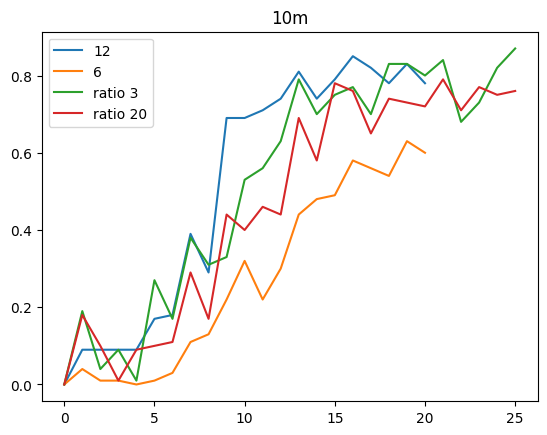

In [ ]:
plt.plot(no_cap_12)
plt.plot(no_cap_9)
plt.plot(no_cap_6)
plt.plot(cap_10m_ratio_3)
plt.plot(cap_10m_ratio_20)
plt.title('10m')
plt.legend(['12', '9', '6', 'ratio 3', 'ratio 20'])

In [ ]:
nocap_12_5m = np.array([0, 0.19,0.16,0.19,0.23,0.49,0.55,0.66,0.84,0.88,0.89,0.88,
          0.87,0.88,0.85,0.82,0.92,0.81,0.88,0.9,0.9])
nocap_6_5m = np.array([0. , 0.09, 0.05, 0.04, 0.21, 0.25, 0.21, 0.3 , 0.32, 0.44, 0.51,
         0.46, 0.49, 0.55, 0.51, 0.49, 0.59, 0.54, 0.58, 0.62, 0.68])
cap_5m = np.array([0 ,0.16, 0.13, 0.39, 0.29, 0.47, 0.55, 0.71, 0.79, 0.78, 0.84, 0.87, 0.84, 
          0.78, 0.83, 0.68, 0.75, 0.86 ,0.86, 0.88, 0.79])
cap_5m_ratio_3 = [0.08,0.05,0.28,0.35,0.46,0.44,0.59,0.5,0.47,0.7,0.75,0.75,0.75,0.84,0.83,0.77,0.78,0.77,0.81,0.77,0.82,0.81,0.85,0.87,0.84]
cap_5_ratio_20 = [0.0, 0.06, 0.03, 0.1, 0.26, 0.52, 0.49, 0.46, 0.57, 0.75,0.66, 0.69, 0.71, 0.78, 0.74, 0.77, 0.87, 0.82, 0.88, 0.78, 0.74, 0.83, 0.71, 0.85, 0.73, 0.72]


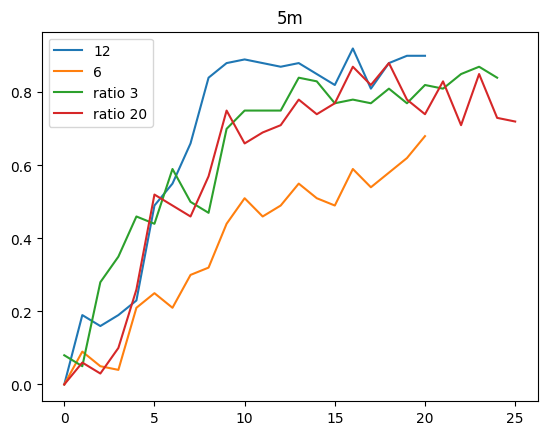

In [ ]:
plt.plot(nocap_12_5m)
plt.plot(nocap_6_5m)
plt.plot(cap_5m_ratio_3)
plt.plot(cap_5_ratio_20)
plt.title('5m')
plt.legend(['12', '6', 'ratio 3', 'ratio 20'])